In [42]:
#simple linear regression 

In [43]:
#1. Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
#2. Load your data from local
# Replace with your actual filename
df = pd.read_csv('F:\\Housing_Price_data.csv')

# Show the first 5 rows
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
#3. EDA of Data
# Check structure
df.info()

# Check summary statistics
df.describe()

# Check for null values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [46]:
#4. fill the missing values or drop (if needed)
df = df.dropna()

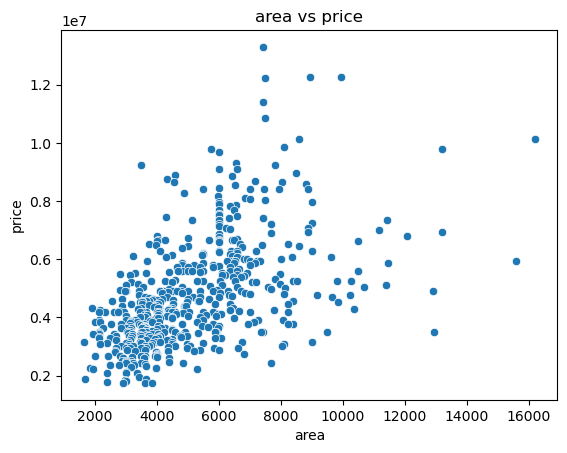

In [47]:
#5. Select the feature for the Simple Linear Regression Model
# Visualize the relationship
sns.scatterplot(x='area', y='price', data=df)
plt.title("area vs price")
plt.show()

In [48]:
#6. Prepare the Data for Model Training and Testing
# Define input (X) and output (y)
X = df[['area']]   # must be 2D
y = df['price']    # target

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#7. Train the Linear Regression Model
# Create model
model = LinearRegression()

# Train it
model.fit(X_train, y_train)

LinearRegression()

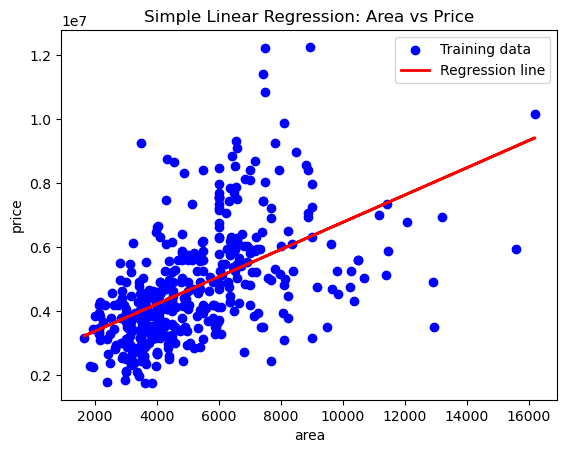

In [50]:
#8. Model Visualization
# Plot the training data with regression line
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression line')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()

In [51]:
#9. Model Evaluation
# Predict
y_pred = model.predict(X_test)

# Compare actual vs predicted
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_result.head())

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

      Actual     Predicted
316  4060000  5.024060e+06
77   6650000  5.279498e+06
360  3710000  4.232203e+06
90   6440000  4.640903e+06
493  2800000  4.198144e+06
Mean Squared Error: 3675286604768.185
R-squared Score: 0.27287851871974644


In [53]:
#10. Usage Function (model or future Prediction)
# Predict price for a house with 2000 sqft area
predicted_price = model.predict(pd.DataFrame({'area': [12.8125]}))
print(f"Predicted price for 16.00 sqft: {predicted_price[0]:,.2f}")

Predicted price for 16.00 sqft: 2,517,708.93


In [54]:
print(len(df))

545
